# Investigating GapMinder DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will explore gapminder dataset to identify the relationship between countries' Murder/Suicide rate and:
a. Unemployment Rate
b. GDP per capita
c. Income inequality

We will be answering the following questions through analyzing the GapMinder Dataset:
- Q1: What is the relationship between income inequality and Murder Rate/Suicide Rate?
- Q2: What is the relationship between unemployment Rate and Suicide Rate/Murder Rate?
- Q3: Which countries are more likely to have high Murder & Suicide Rate?

In [3]:
#Loading numpy, pandas, matploblib and Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Using inline matplotlib for visualization
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we will be loading the data in our dataframes and exploring it to:
   - Check for NaN Values
   - Make sure the dataframes have the same format and are easy to be combined
   - Combine data

### DataSets Used:
- Murder rate (per 100K, age adjusted)
- Suicide rate (per 100k, age adjusted)
- Gini index (Income inequality)
- Unemployment Rate
- GDP per capita

In [39]:
#Loading data for murder rate
df_murder = pd.read_csv('murder_per_100000_people.csv')
df_murder.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.070,2.96,NaN,2.30,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.69,NaN,NaN,NaN,1.51,1.10,0.964,1.12,1.01
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,1.0,1.33,1.46,1.25,1.3,1.39,1.3,1.34,1.54,...,0.978,1.09,1.17,1.01,1.05,1.23,1.06,1.020,1.11,NaN


In [40]:
#Checking column headers
df_murder.columns

Index(['country', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

It looks like the Murder data are collected up to 2016 which need to be considered while analyzing our data.

In [ ]:
#Loading data for suicide rate
df_suicide = pd.read_csv('suicide_per_100000_people.csv')
df_suicide.head()

In [41]:
#Checking Suicide table header
df_suicide.columns

Index(['country', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

Same goes for suicide dataframe it has data up to year 2016

In [15]:
#loading Income Inequality
df_gini = pd.read_csv('gini.csv')
df_gini.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


In [42]:
#Checking Income Inequality dataframe header
df_gini.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=252)

In [28]:
#Loading Unemployment Rate for age group 25-54
df_unemployment = pd.read_csv('aged_25_54_unemployment_rate_percent.csv')
df_unemployment.head()

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.09,NaN,6.73,NaN,NaN,8.4,NaN,NaN,9.89
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.25,NaN,NaN,8.44,NaN,NaN,NaN,NaN,NaN,NaN
3,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.20,12.20,15.3,16.40,15.5,13.9,12.5,11.2,10.6,NaN


In [43]:
#Checking Unemployment rate dataframe header
df_unemployment.columns

Index(['country', '1948', '1949', '1950', '1951', '1952', '1953', '1954',
       '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [44]:
#Loading GDP Per Capita, US Inflation Adjusted
df_gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
df_gdp.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.6k,26.2k,27.1k,27k,28.4k,28.8k,29.3k,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,512,558,569,565,556,553,553,547,555,530
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3980,4170,4220,4270,4170,3920,3790,3600,3460,3170
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3680,3740,3780,3860,3950,4090,4250,4430,4540,4390
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35k,33.8k,33.2k,34.7k,35.8k,37.4k,37.7k,38.3k,39k,34.3k


In [45]:
#Checking GDP dataframe header
df_gdp.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

After looking into the data we have, it looks like our data has the following characterisitcs:
- Murder and Suicide Rate dataframes has data up to year 2016
- Income Inequality dataframe has data up to 2050
- Unemployment Rate and GDP dataframes has data up to 2020

This indicates that the most common year between all dataframes we have is up to year 2016.

### Data Cleaning
In this project we will be analyzing the data mentioned above for all countries but within a specific year (2016) before the pandemic.

So basically, in this section we will do the following:
- Filter all dataframes by year 2016
- Drop NaN values
- Merge the data into one dataframe if needed

In [86]:
''' Filtering murder data by year 2016 and setting country column as the index column'''
df_murder_2016 = df_murder.loc[:,['country','2016']]
# Drop Null Values
df_murder_2016.dropna(inplace=True)

#Setting country as index column
df_murder_2016.set_index('country', inplace=True)
print(df_murder_2016)



                 2016
country              
Armenia         1.010
Austria         0.417
Cyprus          1.230
Czech Republic  0.467
Croatia         1.000
Hungary         0.809
Iceland         0.246
Lithuania       3.050
Moldova         4.240
Mongolia        3.980
Mauritius       1.450
Netherlands     0.567
Romania         1.190
Thailand        2.580


In [88]:
''' Filtering suicide data by year 2016 and setting country column as the index column'''
df_suicide_2016 = df_suicide.loc[:,['country','2016']]
# Drop NaN
df_suicide_2016.dropna(inplace=True)

#Setting country as index column
df_suicide_2016.set_index('country', inplace=True)
print(df_suicide_2016)

                 2016
country              
Armenia          1.85
Austria          9.75
Cyprus           3.75
Czech Republic  10.00
Croatia         11.40
Hungary         12.70
Iceland         11.20
Lithuania       22.90
Moldova         13.00
Mongolia        14.60
Mauritius        7.53
Netherlands      8.88
Romania          7.70
Thailand         5.54


In [89]:
''' Filtering Income Inequality data by year 2016 and setting country column as the index column'''
df_gini_2016 = df_gini.loc[:,['country','2016']]
# Drop NaN
df_gini_2016.dropna(inplace=True)

#Setting country as index column
df_gini_2016.set_index('country', inplace=True)
print(df_gini_2016)

                      2016
country                   
Afghanistan           37.7
Angola                49.4
Albania               33.7
Andorra               35.2
United Arab Emirates  28.4
...                    ...
Samoa                 38.7
Yemen                 36.7
South Africa          63.0
Zambia                57.1
Zimbabwe              44.1

[197 rows x 1 columns]


In [90]:
''' Filtering Unemployment Rate data by year 2016 and setting country column as the index column'''
df_unemployment_2016 = df_unemployment.loc[:,['country','2016']]
# Drop NaN
df_unemployment_2016.dropna(inplace=True)

#Setting country as index column
df_unemployment_2016.set_index('country', inplace=True)
print(df_unemployment_2016)

                       2016
country                    
Albania               13.90
United Arab Emirates   1.18
Armenia               16.80
Australia              4.50
Austria                5.42
...                     ...
Uruguay                5.42
United States          4.15
Venezuela              4.63
Vietnam                1.13
South Africa          24.10

[116 rows x 1 columns]


In [91]:
''' Filtering suicide data by year 2016 and setting country column as the index column'''
df_gdp_2016 = df_gdp.loc[:,['country','2016']]
# Drop NaN
df_gdp_2016.dropna(inplace=True)

#Setting country as index column
df_gdp_2016.set_index('country', inplace=True)
print(df_gdp_2016)

               2016
country            
Aruba         28.8k
Afghanistan     553
Angola         3920
Albania        4090
Andorra       37.4k
...             ...
Samoa          4380
Yemen          1420
South Africa   6210
Zambia         1350
Zimbabwe       1430

[205 rows x 1 columns]


Since the GDP data has characters (k), this indicates the GDP data is of type string. We will need to convert that into float to match the rest of the data types we have within our dataframes.

In [268]:
#Replacing k character with its numeric value then converting it into float
df_gdp_2016['2016'] = df_gdp_2016['2016'].replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_gdp_2016

,2016
country,
Aruba,28800.0
Afghanistan,553.0
Angola,3920.0
Albania,4090.0
Andorra,37400.0
...,...
Samoa,4380.0
Yemen,1420.0
South Africa,6210.0


After filtering the data we have and setting the country to be the index for all dataframes, now its time to combine our data. I will combine the Murder and Suicide rate parameters as they are the main parameters we are trying to analyze and explore against different factors such as: Unemployment Rate, Income Inequality and GDP per capita

In [98]:
df_murder_suicide = df_murder_2016.merge(df_suicide_2016, on='country')
df_murder_suicide.rename(columns={'2016_x':'murder_2016' , '2016_y':'suicide_2016'}, inplace=True)
df_murder_suicide

,murder_2016,suicide_2016
country,,
Armenia,1.010,1.85
Austria,0.417,9.75
Cyprus,1.230,3.75
Czech Republic,0.467,10.00
Croatia,1.000,11.40
Hungary,0.809,12.70
Iceland,0.246,11.20
Lithuania,3.050,22.90
Moldova,4.240,13.00


<a id='eda'></a>
## Exploratory Data Analysis

Since we have cleaned our data, let us try to extract some insights from the data we have in hands. I will start with finding if there is any relation between the murder and suicide rate then I will compare the two parameters with some of the factors that I believe might have a strong correlation with those parameters.

One important insight we want to know is the average murder and suicide rate in 2016 across the world:

In [115]:
avg_murder = df_murder_suicide.murder_2016.mean()
print("Average Murder Rate in 2016: ", round(avg_murder,2))

avg_suicide = df_murder_suicide.suicide_2016.mean()
print("\nAverage Suicide Rate in 2016: ", round(avg_suicide,2))

Average Murder Rate in 2016:  1.59

Average Suicide Rate in 2016:  10.06


From the above calculations, we can see that the average suicide rate was 10.06 in 2016 which was pretty much higher than that of the murder rate 1.59. We need to explore the factors that contributed to high suicide rate in 2016 and which factors are affecting the murder rate as well.

## Q1: What is the correlation betweeen income inequality and murder rate?

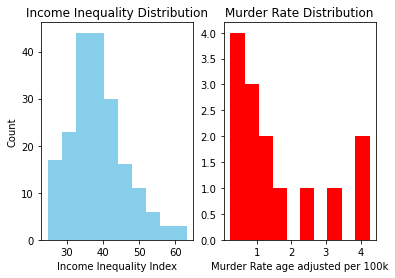

In [148]:
#Plotting two histograms one for the Gini dataframe and other for the murder rate in 2016

plt.subplot(1,2,1) #This is used to plot two histograms side by side
plt.hist(df_gini_2016, color='skyblue', ec='skyblue')
plt.xlabel('Income Inequality Index')
plt.ylabel('Count')
plt.title('Income Inequality Distribution')

plt.subplot(1,2,2)
plt.hist(df_murder_suicide.murder_2016, color='red', ec='red')
plt.xlabel('Murder Rate age adjusted per 100k')
plt.title('Murder Rate Distribution')
plt.show();

As per the histograms, it looks like the income inequality distribution is right skewed meaning that low income inequality is more typical in the available data. While for the murder rate distribution it looks like its aso right skewed. Now let us discover the correlation between the income inequality and the Murder rate.

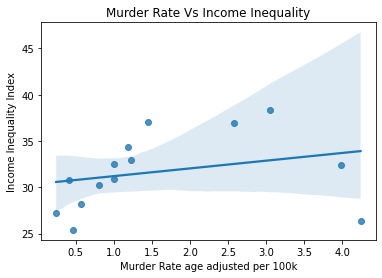

In [199]:
#Merging Gini dataframe and Murder Rate dataframe
df_gini_murder = df_gini_2016.merge(df_murder_2016, on='country')
df_gini_murder.rename(columns={'2016_x':'gini_2016' , '2016_y':'murder_2016'}, inplace=True)
df_gini_murder

sns.regplot(y=df_gini_murder.gini_2016, x=df_gini_murder.murder_2016)
plt.title('Murder Rate Vs Income Inequality')
plt.ylabel('Income Inequality Index')
plt.xlabel('Murder Rate age adjusted per 100k');

#### As per the scatter plot and the regression line, it looks like there is a positive relationship between the income inequality and the murder rate back in 2016. This means that income  inequality leads to higher murder rate in countries.

But why don't we discover the relationship with the Suicide rate as well?

### Suicide Rate Vs Income Inequality

I will start by plotting the Suicide Rate distribution to understand the data better.

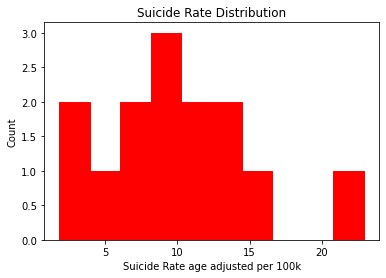

In [213]:
#Plotting Suicide rate distribution in 2016
plt.hist(df_murder_suicide.suicide_2016, color='red', ec='red')
plt.xlabel('Suicide Rate age adjusted per 100k')
plt.ylabel('Count')
plt.title('Suicide Rate Distribution');


As per the histogram the Suicide rate has almost normal distribution for the data we have.
Let's discover the correlation between the Suicide Rate and the Income Inequality:

,gini_2016,suicide_2016
gini_2016,1.000000,0.039799
suicide_2016,0.039799,1.000000


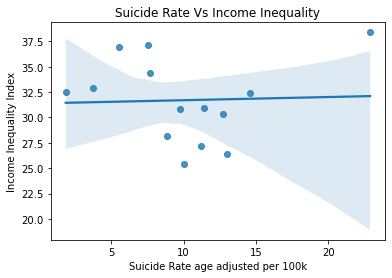

In [204]:
#Merging Gini dataframe and Suicide Rate dataframe
df_gini_suicide = df_gini_2016.merge(df_suicide_2016, on='country')
df_gini_suicide.rename(columns={'2016_x':'gini_2016' , '2016_y':'suicide_2016'}, inplace=True)

#Scatter plot for Suicide Rate Vs Income Inequality
sns.regplot(y=df_gini_suicide.gini_2016, x=df_gini_suicide.suicide_2016)
plt.ylabel("Income Inequality Index")
plt.xlabel("Suicide Rate age adjusted per 100k")
plt.title("Suicide Rate Vs Income Inequality");
df_gini_suicide.corr()

#### As per the scatter plot it shows that there is a very small positive correlation between suicide rate and the income inequality. It is not necessary that the income inequality ratio affects the suicide rate the way it affects the murder rate.

## Q2: What is the impact of unemployment rate in terms of suicide rate and murder rate?

In [180]:
#Merging Unemployment rate with the murder/suicide rate dataframe
df_unempl_sm = df_unemployment_2016.merge(df_murder_suicide, on='country')
df_unempl_sm.rename(columns={'2016':'unemployment_2016'},inplace=True)

,unemployment_2016,murder_2016,suicide_2016
country,,,
Armenia,16.80,1.010,1.85
Austria,5.42,0.417,9.75
Cyprus,11.70,1.230,3.75
Czech Republic,3.54,0.467,10.00
Croatia,11.60,1.000,11.40
Hungary,4.53,0.809,12.70
Iceland,2.48,0.246,11.20
Lithuania,7.39,3.050,22.90
Moldova,4.04,4.240,13.00


### Unemployment Rate Distribution

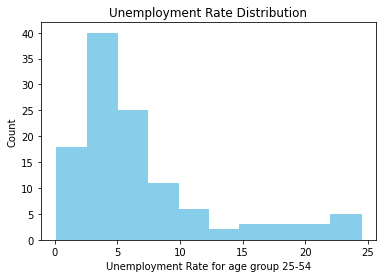

In [215]:
#Plotting unemployment rate distribution in 2016
plt.hist(df_unemployment_2016, color='skyblue', ec='skyblue')
plt.xlabel('Unemployment Rate for age group 25-54')
plt.ylabel('Count')
plt.title('Unemployment Rate Distribution');

Unemployment rate distribution has a right-skew which indicates low unemployment rate is more typical for our data.

### Unemployment Rate Vs Suicide Rate Correlation

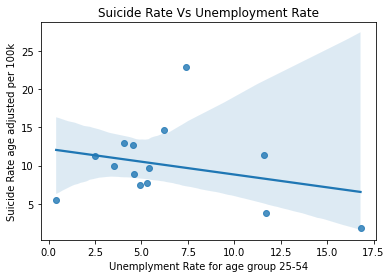

In [203]:
#Scatter plot to demonstrate the impact of unemployment on countries
sns.regplot(x=df_unempl_sm.unemployment_2016, y=df_unempl_sm.suicide_2016)
plt.xlabel("Unemplyment Rate for age group 25-54")
plt.ylabel("Suicide Rate age adjusted per 100k")
plt.title("Suicide Rate Vs Unemployment Rate");

#### It is clear that there is a negative correlation between the suicide rate and the unemployment which means that countries with lower unemployment rate has higher suicide rates.

### Unemployment Rate Vs Murder Rate

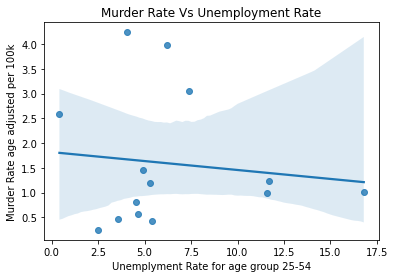

In [209]:
#Scatter plot for murder rate vs unemployment rate
sns.regplot(x=df_unempl_sm.unemployment_2016, y=df_unempl_sm.murder_2016)
plt.xlabel("Unemplyment Rate for age group 25-54")
plt.ylabel("Murder Rate age adjusted per 100k")
plt.title("Murder Rate Vs Unemployment Rate");

#### Same goes for the murder rate, there is a negative correlation between the unemployment rate and the murder rate which means that countries with lower unemployment rate might have higher murder rate.

Let us do a combined scatter plot for both murder and suicide rate against the unemployment rate:

,unemployment_2016,murder_2016,suicide_2016
unemployment_2016,1.000000,-0.116764,-0.279253
murder_2016,-0.116764,1.000000,0.432562
suicide_2016,-0.279253,0.432562,1.000000


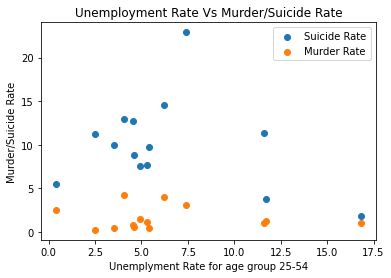

In [214]:
plt.scatter(x=df_unempl_sm.unemployment_2016, y=df_unempl_sm.suicide_2016, label='Suicide Rate')
plt.scatter(x=df_unempl_sm.unemployment_2016, y=df_unempl_sm.murder_2016, label='Murder Rate')
plt.title("Unemployment Rate Vs Murder/Suicide Rate")
plt.xlabel("Unemplyment Rate for age group 25-54")
plt.ylabel("Murder/Suicide Rate")
plt.legend();
df_unempl_sm.corr()

## Q3: Which countries are more likely to have high Murder/Suicide Rate in terms of GDP?

In [270]:
#Merging the GDP per Capita with murder/suicide rate
df_gdp_sm = df_gdp_2016.merge(df_murder_suicide, on='country')
df_gdp_sm.rename(columns={'2016':'GDP_2016'}, inplace=True)

I will plot a combined scatter plot to identify the relationship between the GDP and murder/suicide Rate.

,GDP_2016,murder_2016,suicide_2016
GDP_2016,1.000000,-0.610539,0.001796
murder_2016,-0.610539,1.000000,0.432562
suicide_2016,0.001796,0.432562,1.000000


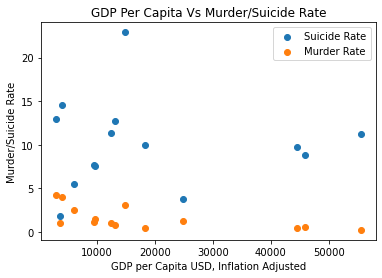

In [271]:
#Scatter plot for GDP vs Murder/Suicide Rate
plt.scatter(x=df_gdp_sm.GDP_2016, y=df_gdp_sm.suicide_2016, label='Suicide Rate')
plt.scatter(x=df_gdp_sm.GDP_2016, y=df_gdp_sm.murder_2016, label='Murder Rate')
plt.title("GDP Per Capita Vs Murder/Suicide Rate")
plt.xlabel("GDP per Capita USD, Inflation Adjusted")
plt.ylabel("Murder/Suicide Rate")
plt.legend();
df_gdp_sm.corr()

### GDP Vs Murder Rate

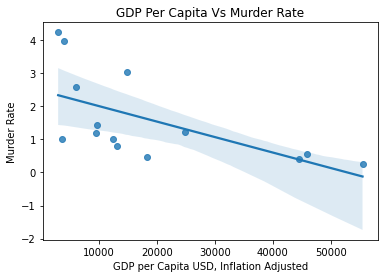

In [273]:
#Scatter plot for GDP Vs Murder rate
sns.regplot(x=df_gdp_sm.GDP_2016, y=df_gdp_sm.murder_2016)
plt.title("GDP Per Capita Vs Murder Rate")
plt.xlabel("GDP per Capita USD, Inflation Adjusted")
plt.ylabel("Murder Rate");

#### There is a negative correlation between the GDP per capita and the murder rate which indicates that lower GDP countries tend to have higher murder rate.

### GDP Vs Suicide Rate

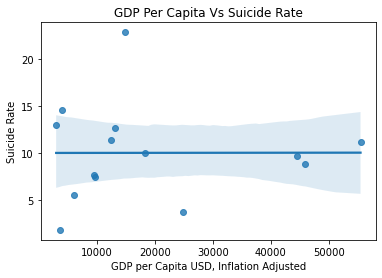

In [274]:
#Scatter plot for GDP Vs Suicide Rate
sns.regplot(x=df_gdp_sm.GDP_2016, y=df_gdp_sm.suicide_2016)
plt.title("GDP Per Capita Vs Suicide Rate")
plt.xlabel("GDP per Capita USD, Inflation Adjusted")
plt.ylabel("Suicide Rate");

#### As per the scatter plot, it looks like there is almost neutral correlation between the GDP and the suicide rate. This means the GDP per capita has no impact on the suicide rate but as an overall, lower GDP countries tend to have higher murder rate.



<a id='conclusions'></a>
## Conclusions

By exploring of data in Year 2016 it appeared that:
- Worldwide average Murder rate is higher than average suicide rate for year 2016.
- Income inequality has a positive relationship with murder rate and a very small positive relationship with the suicide rate which indicates higher income inequality countries tend to have higher murder/suicide rate.
- Unemployment has negative relationshop with both murder and suicide rates which means that higher unemployment countries tend to have slightly lower murder/suicide rate.
- Higher murder rates are found in low GDP/Capita countries while we cannot identify the impact of GDP on suicide rate because there is almost no correlation or a very small positive correlation.

#### Important Note
The above observations come from investigating data from one year for specific parameters, the result might be slightly different for other years or for other parameters